In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [49]:
logins = pd.read_json('C:/Users/rishp/Downloads/ultimate_challenge/logins.json')

In [50]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [51]:
logins.set_index('login_time', inplace=True)


In [52]:
logins['count'] = 1

In [53]:
df = logins.resample('15T', label='right').sum()


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [55]:
df['time'] = pd.to_datetime(df.index)


In [60]:
df['month'] = df.time.dt.month
df['day'] = df.time.dt.day
df['hour'] = df.time.dt.hour
df['week'] = df.time.dt.isocalendar().week
df['weekday'] = df.time.dt.weekday

In [61]:
df.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

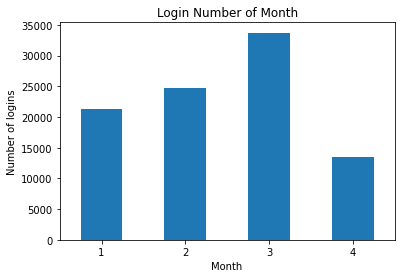

In [62]:
df.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

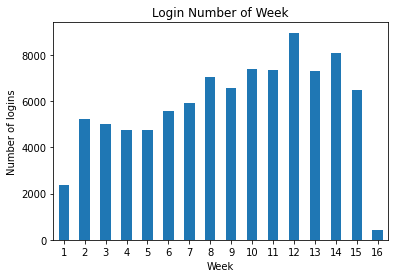

In [63]:
df.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [65]:
import calendar
nweek = 16   # total weeks 
print ('[Grouping by weekday]')
print (df.groupby('weekday')['count'].aggregate(np.sum)/nweek)

[Grouping by weekday]
weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

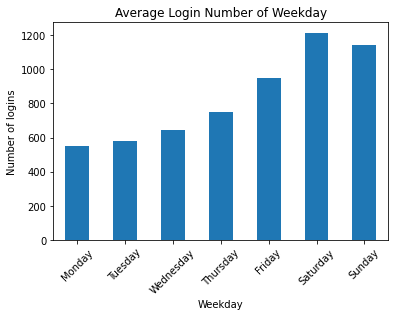

In [66]:
ax = (df.groupby('weekday')['count'].sum()/nweek).plot(kind='bar')
plt.title("Average Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

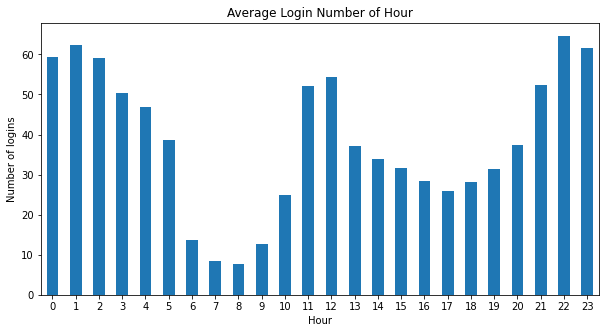

In [67]:
nday = 30+28+30+13   # total days
(df.groupby('hour')['count'].sum()/nday).plot(kind='bar', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Login counts kept increasing from January to March and reached the peak in March.
In a week's step, login counts rised and droped a little. Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.
Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most. Login numbers on weekends varied most.
Most logins are at night, from 10 PM to 2 AM. Least logins are in the morning. There are more logins at noon than in the afternoon.

Part 2 Experiment and Design 

Solution: The amount of tolls reimbursed is a good indicator as to how many of the partner drivers are successfully partaking in the experiment and how successful the experiment is. 
I will implement the experiment by collecting the data of the toll costs reimbursed, include date, time, cost, direction, driver parterns from which city, toll costs incharged. Then we will aggregate and anlalyze the data to find out the trend. If the costs reimbursed and percentage are increasing,

In [73]:
df = pd.read_json('C:/Users/rishp/Downloads/ultimate_challenge/ultimate_data_challenge.json')

In [74]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [76]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [77]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [79]:
categorical_features = ['city', 'phone', 'ultimate_black_user']

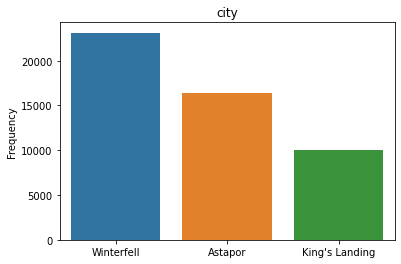

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


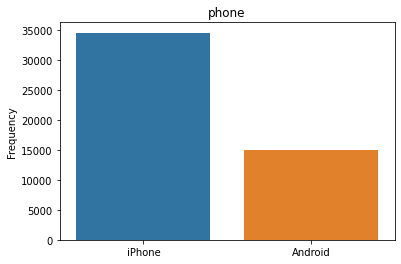

iPhone     34582
Android    15022
Name: phone, dtype: int64


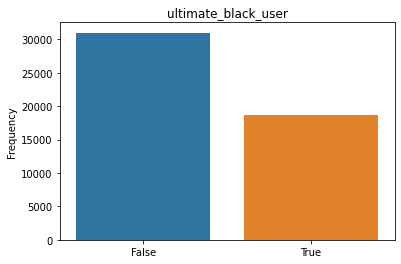

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [80]:
for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

In [81]:
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

C:\Users\rishp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


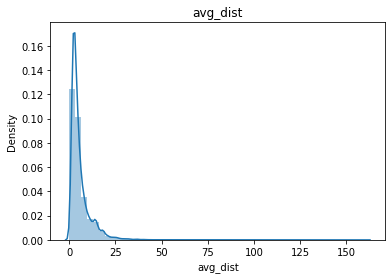

C:\Users\rishp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


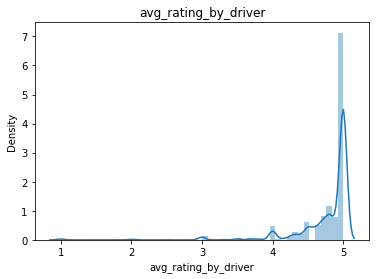

C:\Users\rishp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


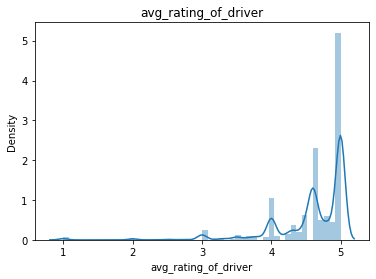

C:\Users\rishp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


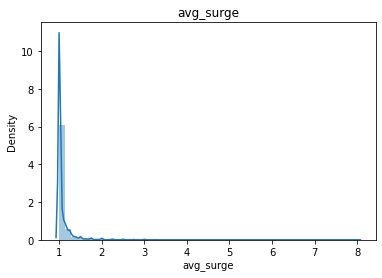

C:\Users\rishp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


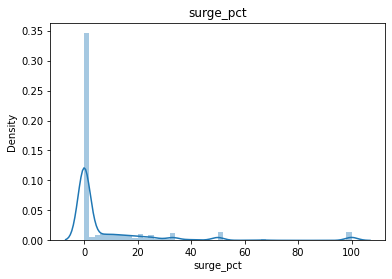

C:\Users\rishp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


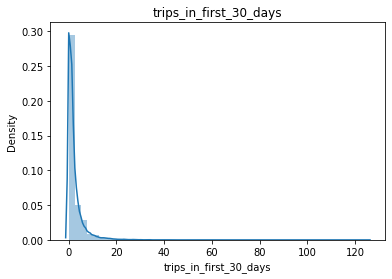

C:\Users\rishp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


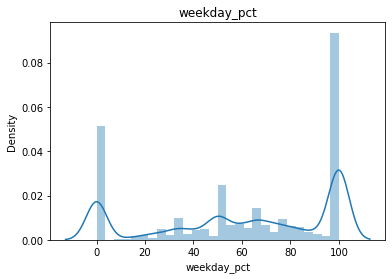

In [82]:
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show();

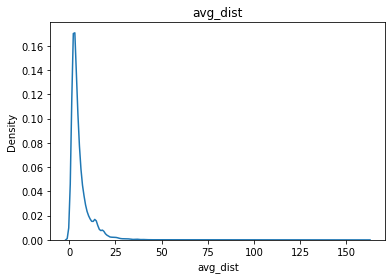

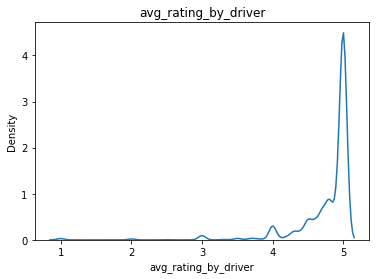

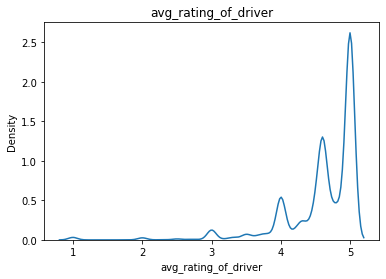

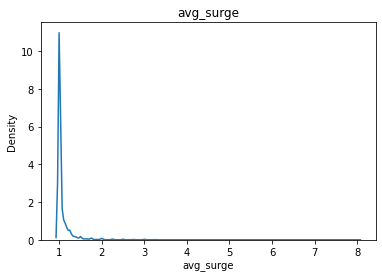

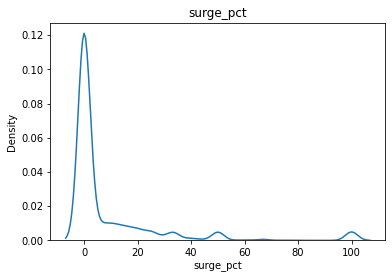

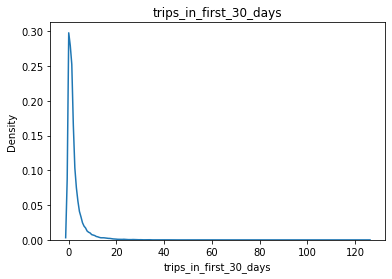

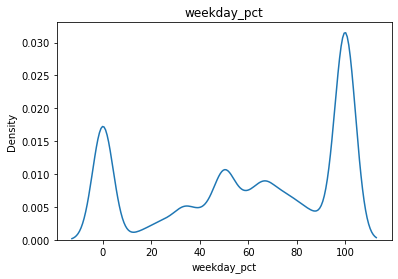

In [83]:
for feature in numerical_features:
    sns.kdeplot(df[feature])
    plt.title(feature)
    plt.show();

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


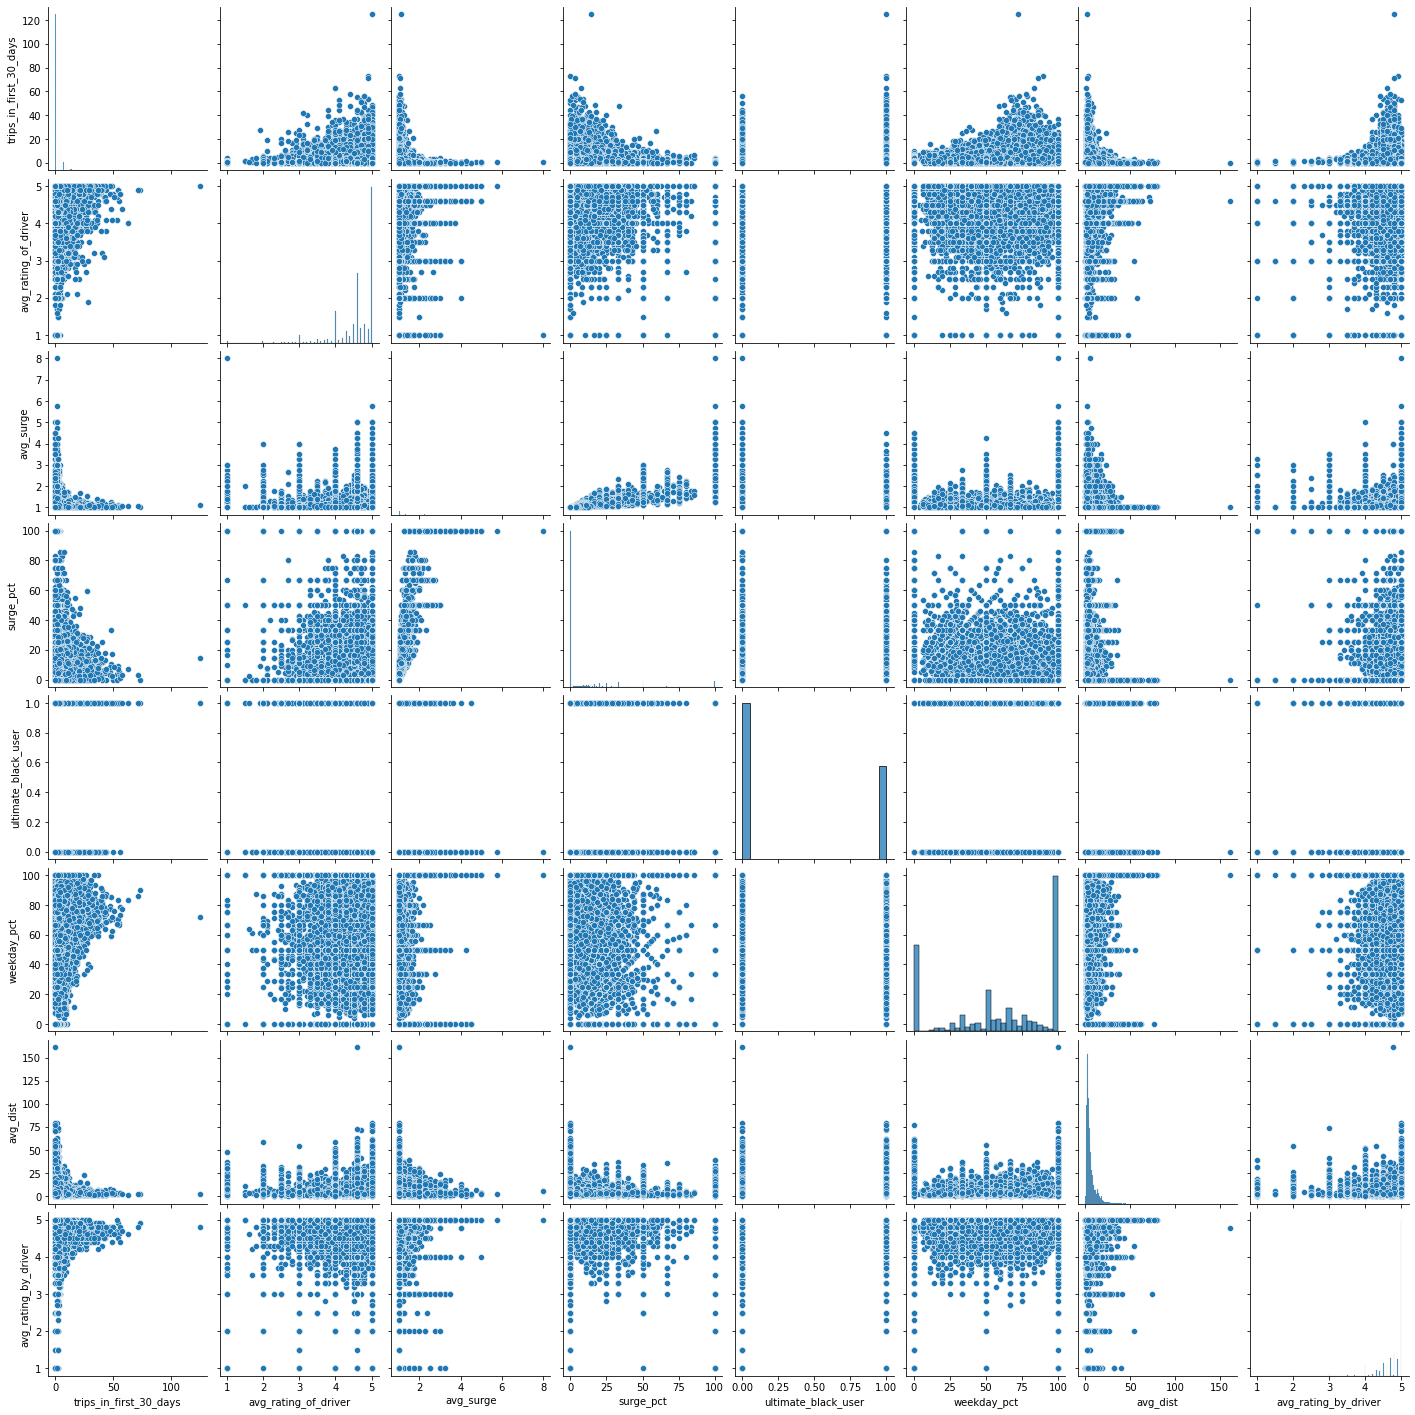

In [84]:
sns.pairplot(df)


In [85]:
df['last_trip_date'].sort_values().tail()


45516   2014-07-01
12139   2014-07-01
18814   2014-07-01
12085   2014-07-01
31587   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

So the latest 'last_trip_date' is 2014-07-01. As we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days, We consider a user retained if his 'last_trip_date' is after 2014-06-01.

In [86]:
frac = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.65% of the observed users were retained.


Data Modeling

In [88]:
df['retained'] = (df['last_trip_date'] > '2014-06-01')*1


In [89]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  retained                49604 non-null  int32 

In [91]:
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)


In [92]:
ndf = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [93]:
X = ndf.drop('retained', axis=1)
y = ndf['retained']

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37203, 11)
(12401, 11)
(37203,)
(12401,)


We will be using a Random Forest Model in order to deal with both the categorical and numerical values as well as ensuring that we do not have to worry about overfitting the data with our model. We will be checking our accuracy as well as the classification report in order to see how well our model performs with this classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [96]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.76239753 0.75782825 0.76938584 0.7688172  0.76397849]
Average 5-Fold CV Score: 0.7644814620534585


In [97]:
from sklearn.model_selection import GridSearchCV


In [98]:
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [99]:
n_estimators = [10,20,50,100,200]
max_features = [5, 8, 10, None]
oob_score = [True, False]
param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'oob_score': oob_score}

In [100]:
clf_cv = GridSearchCV(clf, param_grid, cv=5)    
clf_cv.fit(X_train, y_train)
y_predict = clf_cv.predict(X_test) 

C:\Users\rishp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\rishp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\rishp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\rishp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\rishp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

In [103]:
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))

Tuned Parameter: {'max_features': 10, 'n_estimators': 200, 'oob_score': False}
Tuned Score: 0.7657984748841423


In [104]:
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Test set performance:
Accuracy:  0.7617127650995887
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7869
           1       0.68      0.65      0.67      4532

    accuracy                           0.76     12401
   macro avg       0.74      0.74      0.74     12401
weighted avg       0.76      0.76      0.76     12401



Final Model

In [105]:
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [107]:
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      7869
           1       0.68      0.66      0.67      4532

    accuracy                           0.76     12401
   macro avg       0.75      0.74      0.74     12401
weighted avg       0.76      0.76      0.76     12401

Test set accuracy: 76.43%


In [108]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,6484,1385
1,1538,2994


Text(0.5, 1.0, 'ROC Curve')

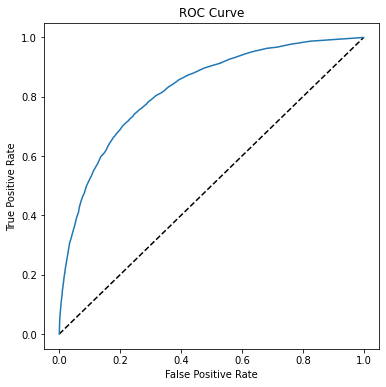

In [109]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [110]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))


AUC: 0.8248


The metrics of final model are:

Test set accuracy: 76.43%
AUC: 0.8248

IV. Suggestions to Ultimate
To improve long-term rider retention, Ultimate need improve in the following aspects:

Attract riders to take longer trips during the first 30 days after signup.
Provide better service to get higher ratings from the riders.
Persuade riders to take trips during weekdays.